In [1]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("data/co2_emissions_kt_by_country.csv")
country_mapping = pd.read_csv("data/continents2.csv")

In [7]:
df.tail()

,country_code,country_name,year,value
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114
13952,ZWE,Zimbabwe,2019,11760.000229


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [6]:
df.isnull().sum()


country_code    0
country_name    0
year            0
value           0
dtype: int64

In [10]:
df.drop_duplicates()


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


# analysis

In [21]:
country_mapping = country_mapping.rename(columns={"name": "country_name"})

In [22]:
country_mapping.head()

,country_name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [33]:
df = df.merge(country_mapping, on="country_name")
df = df.drop(["alpha-2", "alpha-3", "iso_3166-2", "region-code", "sub-region-code", "intermediate-region-code", "country-code"], axis=1)
df.tail()

,country_code,country_name,year,value,region_x,sub-region_x,intermediate-region_x,region_y,sub-region_y,intermediate-region_y,region,sub-region,intermediate-region
9598,ZWE,Zimbabwe,2015,12430.000305,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa
9599,ZWE,Zimbabwe,2016,11020.000458,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa
9600,ZWE,Zimbabwe,2017,10340.000153,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa
9601,ZWE,Zimbabwe,2018,12380.000114,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa
9602,ZWE,Zimbabwe,2019,11760.000229,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa,Africa,Sub-Saharan Africa,Eastern Africa


In [49]:
average_per_country = df.groupby('country_name')["value"].mean().reset_index()

regions = df[['country_name', 'region']].drop_duplicates()
average_per_country = average_per_country.merge(regions, on="country_name")
average_per_region = average_per_country.groupby("region")["value"].mean().reset_index()
average_per_region

,region,value
0,Africa,12281.684442
1,Americas,168496.030956
2,Asia,176726.829814
3,Europe,107897.432022
4,Oceania,19506.040739


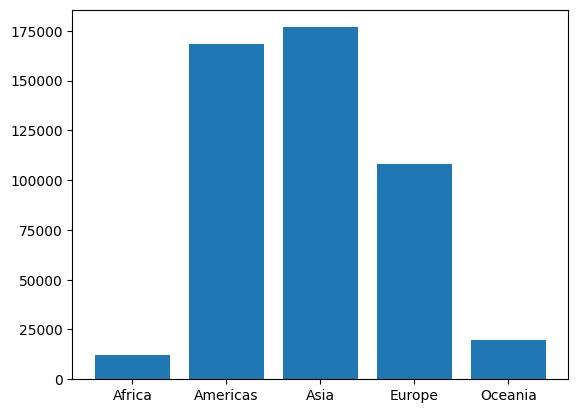

In [52]:
import matplotlib.pyplot as plt

plt.bar(average_per_region["region"], average_per_region["value"])
plt.show()

In [60]:
first_20 = df[df["year"] <= 1980]
mid_20 = df[df["year"] <= 2000]
last_20 = df[df["year"] <= 2020]

first_20 = first_20.groupby("region")["value"].mean().reset_index()
mid_20 = mid_20.groupby("region")["value"].mean().reset_index()
last_20 = last_20.groupby("region")["value"].mean().reset_index()

means_per_20 = {"first_20": first_20,
                "mid_20": mid_20,
                "last_20": last_20}


,region,value
0,Africa,6528.023787
1,Americas,141535.347940
2,Asia,68178.190241
3,Europe,103847.547130
4,Oceania,13140.970214


In [76]:
merged_df

,value_x,value_y,value
region,,,
Africa,6528.023787,9651.999362,12873.562798
Americas,141535.347940,161059.182536,176814.378675
Asia,68178.190241,111244.244433,194660.170302
Europe,103847.547130,111995.572184,109308.426468
Oceania,13140.970214,17404.183243,21213.097173


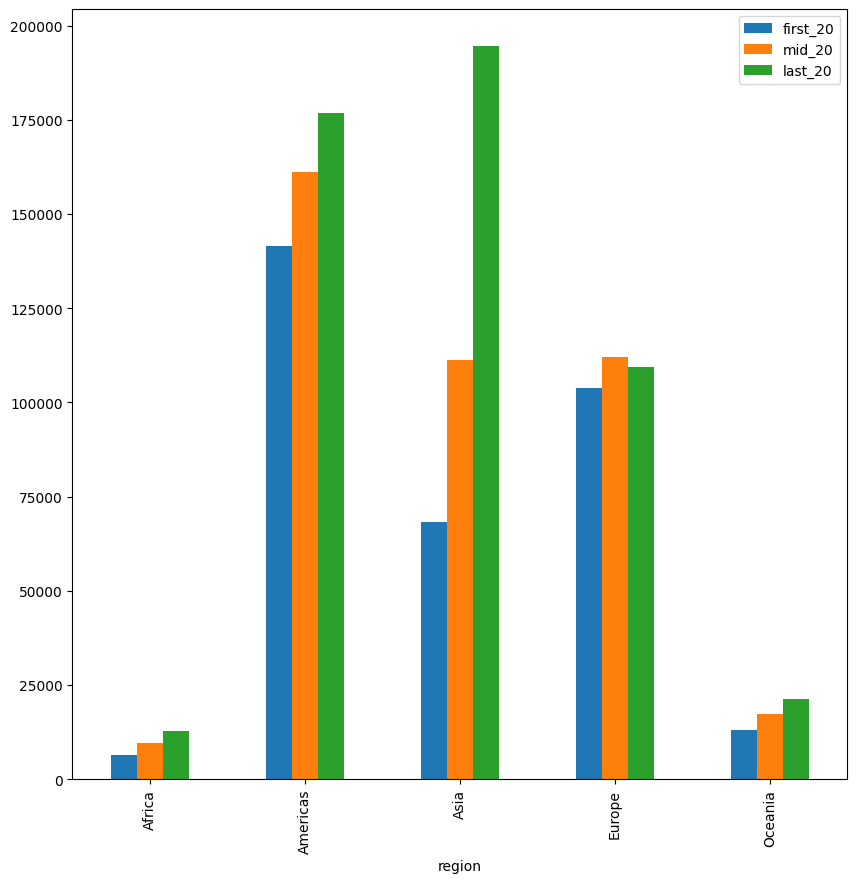

In [77]:
merged_df = first_20.merge(mid_20, on="region").merge(last_20, on="region")
merged_df.rename(columns={"value_x": "first_20", "value_y": "mid_20", "value": "last_20"}, inplace=True)
merged_df.set_index("region", inplace=True)
merged_df.plot(kind='bar', figsize=(10,10))


plt.show()